In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:33<00:00, 38.3MB/s]
100% 1.06G/1.06G [00:33<00:00, 34.0MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)  
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)  
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [31]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 70s 111ms/step - loss: 1.1742 - accuracy: 0.6048 - val_loss: 0.6223 - val_accuracy: 0.6354
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5364 - accuracy: 0.7304 - val_loss: 0.5140 - val_accuracy: 0.7460
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4559 - accuracy: 0.7834 - val_loss: 0.5957 - val_accuracy: 0.6768
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4215 - accuracy: 0.8123 - val_loss: 0.4581 - val_accuracy: 0.7946
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3453 - accuracy: 0.8497 - val_loss: 0.5579 - val_accuracy: 0.7378
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2739 - accuracy: 0.8827 - val_loss: 0.5167 - val_accuracy: 0.7988
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2027 - accuracy: 0.9182 - val_loss: 0.5745 - val_ac

In [34]:
history.history

{'loss': [1.1742162704467773,
  0.5363780856132507,
  0.4559330642223358,
  0.42151787877082825,
  0.34526070952415466,
  0.2739381790161133,
  0.20269818603992462,
  0.13965758681297302,
  0.09353362768888474,
  0.07309626787900925],
 'accuracy': [0.6048499941825867,
  0.730400025844574,
  0.7833999991416931,
  0.8123499751091003,
  0.8497499823570251,
  0.8827000260353088,
  0.918150007724762,
  0.9480000138282776,
  0.9664499759674072,
  0.9745500087738037],
 'val_loss': [0.6222918629646301,
  0.5139551758766174,
  0.5956849455833435,
  0.4581068754196167,
  0.5578815937042236,
  0.5166558623313904,
  0.5745176076889038,
  0.6359305381774902,
  0.7448102831840515,
  1.140738606452942],
 'val_accuracy': [0.6353999972343445,
  0.7459999918937683,
  0.676800012588501,
  0.7946000099182129,
  0.7378000020980835,
  0.798799991607666,
  0.8101999759674072,
  0.8230000138282776,
  0.8180000185966492,
  0.6769999861717224]}

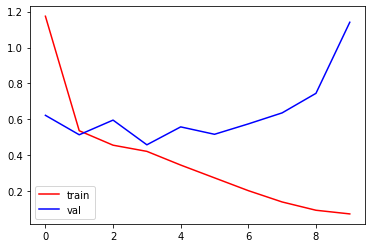

In [35]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='val')
plt.legend()

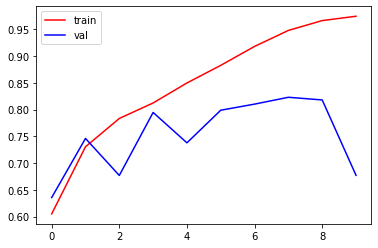

In [36]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='val')
plt.legend()

In [74]:
import cv2

In [75]:
test_img = cv2.imread('/content/cat.jpg')

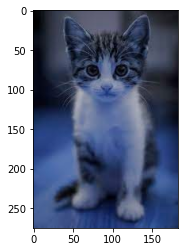

In [76]:
plt.imshow(test_img)

In [77]:
test_img.shape

(275, 183, 3)

In [78]:
test_img = cv2.resize(test_img,(256,256))

In [79]:
test_input = test_img.reshape((1,256,256,3))

In [80]:
model.predict(test_input)

array([[1.]], dtype=float32)